In [30]:

import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.datasets import make_circles


In [31]:
# Generate sample dataset
X,y = make_circles(n_samples=1000, noise=0.1, random_state=42)

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [32]:
#Train Naive Bayes Classifier
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

GaussianNB()

In [33]:
#Train Logistic Regression Classifier with Regularization
lr_model = LogisticRegression(C=1.0)
lr_model.fit(X_train, y_train)

LogisticRegression()

In [34]:
#Make Predictions
nb_predictions = nb_model.predict(X_test)
lr_predictions = lr_model.predict(X_test)

#Calculate Accuracy
nb_accuracy = accuracy_score(y_test, nb_predictions)
lr_accuracy = accuracy_score(y_test, lr_predictions)

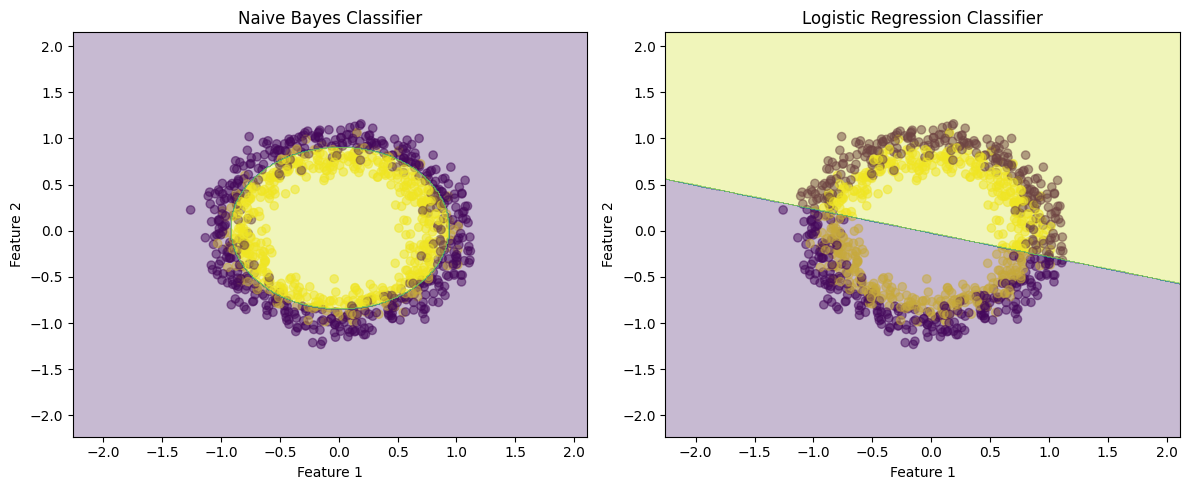

Naive Bayes Accuracy: 75.00%
Logistic Regression Accuracy: 46.50%


In [35]:
output_folder = r"E:\Machine Learning\Models\Gaussian Naive Bayes-Logistic Regression-Ensembling\output"
#Plot decision boundaries
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.title("Naive Bayes Classifier")
plt.scatter(X[:,0],X[:,1], c=y, cmap='viridis', marker='o', alpha=0.5)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
#Plot Decision boundary for Naive Bayes
h=0.01
x_min, x_max = X[:,0].min()-1, X[:,0].max() + 1
y_min, y_max = X[:,1].min()-1, X[:,1].max() + 1
xx,yy = np.meshgrid(np.arange(x_min,x_max,h), np.arange(y_min,y_max,h))
Z = nb_model.predict(np.c_[xx.ravel(), yy.ravel()])
Z= Z.reshape(xx.shape)
plt.contourf(xx,yy,Z, alpha=0.3, cmap='viridis')

plt.subplot(1,2,2)
plt.title("Logistic Regression Classifier")
plt.scatter(X[:,0],X[:,1], c=y, cmap='viridis', marker='o', alpha=0.5)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

#Plot Decision boundary for Logistic Regression
Z= lr_model.predict(np.c_[xx.ravel(), yy.ravel()])
Z= Z.reshape(xx.shape)
plt.contourf(xx,yy,Z, alpha=0.3, cmap='viridis')
plt.tight_layout()
plt.savefig(f"{output_folder}/Decision Boundaries.jpg",format='jpg', dpi=300, bbox_inches='tight')
plt.show()

print(f"Naive Bayes Accuracy: {nb_accuracy * 100:.2f}%")
print(f"Logistic Regression Accuracy: {lr_accuracy * 100:.2f}%")
